<a href="https://colab.research.google.com/github/SM-Learning/advanced-rag-techniques/blob/main/Topic_Model_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Python Script to Extract Data Points from Text

import re
import pandas as pd
import spacy
from tabulate import tabulate

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")


In [5]:
# Input text
data_text = """
Tapeponents Co Inc is a company that operates in the Custom Software & IT Services industry. It employs 20to49 people and has 1Mto5M of revenue. The company is headquartered in Birmingham, Michigan.

Cyber Solutions LIC is a company that operates in the Membership Organizations industry. It employs 5to9 people and has 500kto1m of revenue. The company is headquartered in Councel, Iowa.

1221 Dresden LP is a company that operates in the Commercial & Residential Construction industry. It employs 10to19 people and has under500K of revenue. The company is headquartered in Central Bohemia, Czech Republic.

Dr Kevan Stewart is a company that operates in the Physicians Clinics industry. It employs 1to4 people and has under500K of revenue. The company is headquartered in Orlando, Florida.

A Perfect Ten Hair & Nail Salon is a company that operates in the Shops & Beauty Salons industry. It employs 1to4 people and has 500Kto1M of revenue. The company is headquartered in Anaheim, California.

Northmar Distributors is a company that operates in the Advertising & Marketing industry. It employs 5to9 people and has IMto5M of revenue. The company is headquartered in North Bay, Ontario, Canada.

OSCA Technologies provides innovative technology to process organic waste into a useable resource enabling a reduction in waste and an increase in revenue and productivity. The 100% Australian owned and operated company works closely with global clients.

Fox Enterprise Inc is a company that operates in the Information & Document Management industry. It employs 1to4 people and has 500Kto1M of revenue. The company is headquartered in Denton North East Ward, Lancashire, United Kingdom.

Durch unser Netzwerk unterstützen wit Sie im Back-office, bei Leads und beim Außenauftritt. Diskret und profesionell machen wit sie erfalgreich (er).

15 Year of Experience in Providing Services for Corporate Branding, Digital Marketing, IT solutions, Mobile Applications, 3D Animations, Business Consulting, Remote Staffing.

K. P. InfoTech is a Professionally Managed company, with a Dedicated.CA Company LLC is a company that operates in the Information & Document Management industry. It employs 20to49 people and has 1Mto5M of revenue. The company is headquartered in Charlotte, North Carolina.

Henderson Dental Assistant School was founded by a Dentist due to a lack of qualified Dental Assistantsin today's current jobmarket. We provide real-world Dental Assisting skills.

Ideal Borrachas is a company that operates in the Retail industry. It employs 20to49 people and has IMtoM of revenue. The company is headquartered in Goiania, Goiás, Brazil.
"""

In [31]:
def extract_data_points(text):
    data = []
    for sentence in text.splitlines():
        if sentence.strip():
            # Extract company name and clean HTML tags
            company_match = re.search(r"^([\w\s&.,-]+)(?: is a (?:company|Professionally))", sentence)
            #company_match = re.search(r"^([\w\s&.,-]+) is a company", sentence)
            company_name = company_match.group(1).strip() if company_match else ""
            company_name = re.sub(r"<[^>]+>", "", company_name)  # Remove HTML tags
            company_name = company_name[:50]  # Limit to first 50 characters

            # Extract industry
            industry_match = re.search(r"operates in the ([\w\s&]+) industry", sentence)
            industry = industry_match.group(1).strip() if industry_match else ""
            if len(industry) > 50:
                industry = ""  # Set to blank if length exceeds 50 chars

            # Extract employee count
            employee_count_match = re.search(r"employs ([\w]+) people", sentence)
            employee_count = employee_count_match.group(1).strip() if employee_count_match else ""

            # Extract revenue
            revenue_match = re.search(r"has ([\w]+) of revenue", sentence)
            revenue = revenue_match.group(1).strip() if revenue_match else ""

            # Extract location
            location_match = re.search(r"headquartered in ([\w\s,]+)", sentence)
            location = location_match.group(1).strip() if location_match else ""

            # Split location into three fields
            location_parts = location.split(", ") if location else ["", "", ""]
            location1 = location_parts[0] if len(location_parts) > 0 else ""
            location2 = location_parts[1] if len(location_parts) > 1 else ""
            location3 = location_parts[2] if len(location_parts) > 2 else ""

            # Add the extracted data
            data.append({
                "Input Text": sentence.strip(),
                "Company Name": company_name,
                "Industry": industry,
                "Employee Count": employee_count,
                "Revenue": revenue,
                "Location 1": location1,
                "Location 2": location2,
                "Location 3": location3,
            })
    return data

In [32]:
# Extract data from the text
data = extract_data_points(data_text)

# Create a single DataFrame with both input and extracted fields
df = pd.DataFrame(data)

# Clean up data
df["Employee Count"] = df["Employee Count"].str.replace("to", "-")
df["Revenue"] = df["Revenue"].str.replace("to", "-")

In [33]:
# Print input and output
print("Input Text with Extracted Data:")
print(tabulate(df, headers="keys", tablefmt="grid", showindex=False))

Input Text with Extracted Data:
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------+---------------------------------------+------------------+-----------+------------------------+----------------+----------------+
| Input Text                                                                                                                                                                                                                                                                       | Company Name                                       | Industry                              | Employee Count   | Revenue   | Location 1             | Location 2     | Location 3     |
+===============================================

In [34]:
df.head(100)

,Input Text,Company Name,Industry,Employee Count,Revenue,Location 1,Location 2,Location 3
0,Tapeponents Co Inc is a company that operates ...,Tapeponents Co Inc,Custom Software & IT Services,20-49,1M-5M,Birmingham,Michigan,
1,Cyber Solutions LIC is a company that operates...,Cyber Solutions LIC,Membership Organizations,5-9,500k-1m,Councel,Iowa,
2,1221 Dresden LP is a company that operates in ...,1221 Dresden LP,Commercial & Residential Construction,10-19,under500K,Central Bohemia,Czech Republic,
3,Dr Kevan Stewart is a company that operates in...,Dr Kevan Stewart,Physicians Clinics,1-4,under500K,Orlando,Florida,
4,A Perfect Ten Hair & Nail Salon is a company t...,A Perfect Ten Hair & Nail Salon,Shops & Beauty Salons,1-4,500K-1M,Anaheim,California,
5,Northmar Distributors is a company that operat...,Northmar Distributors,Advertising & Marketing,5-9,IM-5M,North Bay,Ontario,Canada
6,OSCA Technologies provides innovative technolo...,,,,,,,
7,Fox Enterprise Inc is a company that operates ...,Fox Enterprise Inc,Information & Document Management,1-4,500K-1M,Denton North East Ward,Lancashire,United Kingdom
8,Durch unser Netzwerk unterstützen wit Sie im B...,,,,,,,
9,15 Year of Experience in Providing Services fo...,,,,,,,


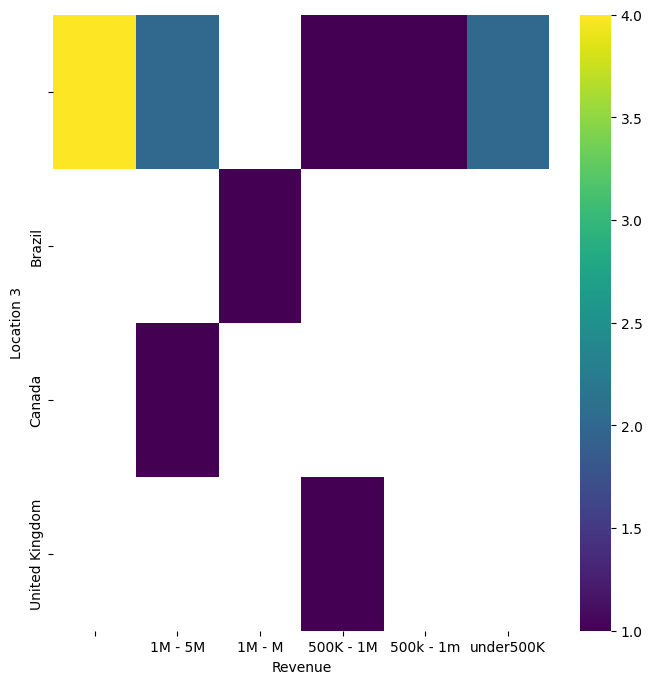

In [22]:
# @title Revenue vs Location 3

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Location 3'].value_counts()
    for x_label, grp in df.groupby('Revenue')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Revenue')
_ = plt.ylabel('Location 3')

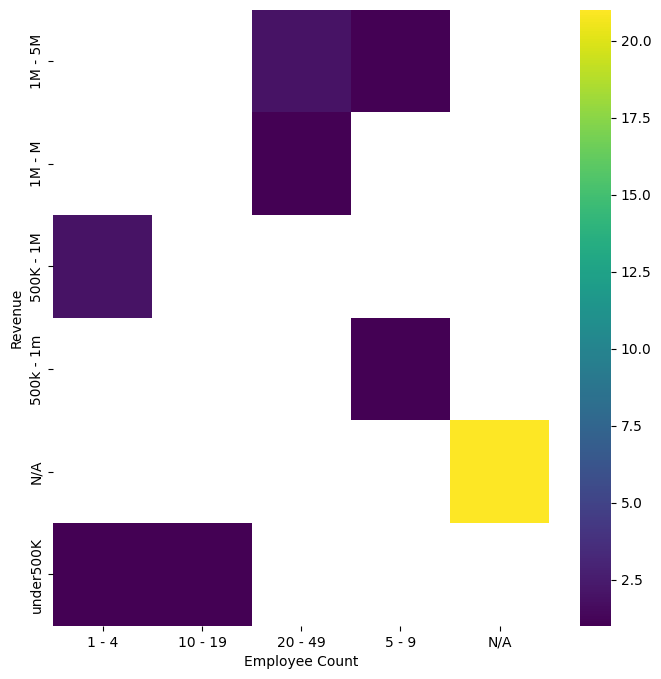

In [16]:
# @title Employee Count vs Revenue

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Revenue'].value_counts()
    for x_label, grp in df.groupby('Employee Count')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Employee Count')
_ = plt.ylabel('Revenue')

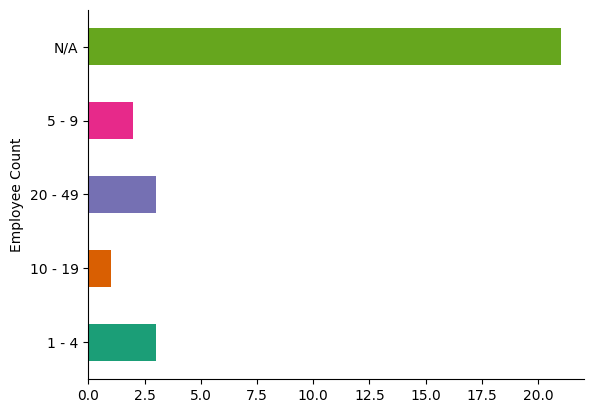

In [15]:
# @title Employee Count

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Employee Count').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)